In [1]:
import pandas as pd
import numpy as np

## Import data

In [2]:
# Import data
race_df = pd.read_csv("race_results_with_ids_1.csv")
race_df

,Race ID,Race Name,Race Time,Track Info,Weather Icon,Grade,Finish Position,Bracket Number,Horse Number,Horse Name,...,Final Time,Margin,Position at Bends,Last 3F,Odds,Favorite,Horse Weight (kg),Trainer,Owner,Prize (¥ mil)
0,198906050510,NaN,15:25,T1600m(R Outer),Weather01,G3,1,8,15,Yamatake Sally,...,1:35.5,NaN,1-1-1,35.4,14.9,8.0,452(+6),S.Hatakeyama,Takeyuki Yamanaka,28.0
1,198906050510,NaN,15:25,T1600m(R Outer),Weather01,G3,2,3,5,Takara Smile,...,1:35.5,hd,5-5-4,34.9,13.0,7.0,474(+4),E.Sakamoto,Teruo Murayama,11.0
2,198906050510,NaN,15:25,T1600m(R Outer),Weather01,G3,3,6,10,Feather My Hat,...,1:35.5,nse,3-3-3,35.2,4.7,2.0,416(0),K.Hongo,Shadai Race Horse Co. Ltd.,7.0
3,198906050510,NaN,15:25,T1600m(R Outer),Weather01,G3,4,1,1,Asahi Pasion,...,1:35.7,1.1/4,8-7-7,34.9,3.4,1.0,478(0),Z.Ishige,K.Terauchi,4.2
4,198906050510,NaN,15:25,T1600m(R Outer),Weather01,G3,5,3,4,Star Roman,...,1:35.9,1.1/4,2-2-2,35.7,5.3,3.0,476(-4),K.Takamatsu,Horseman,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61397,202510011011,KOKURA DAISHOTEN,15:20,T1800m(R),Weather02,G3,10,7,11,Yamanin Ours,...,1:47.0,3/4,2-2-2-2,36.3,6.4,3.0,600(+9),T.Saito,Hajime Doi,NaN
61398,202510011011,KOKURA DAISHOTEN,15:20,T1800m(R),Weather02,G3,11,8,14,Air Fanditha,...,1:47.0,hd,12-11-13-13,34.5,17.9,9.0,460(-10),M.Ikezoe,Lucky Field Co. Ltd.,NaN
61399,202510011011,KOKURA DAISHOTEN,15:20,T1800m(R),Weather02,G3,12,8,13,Galaxy Knight,...,1:47.4,2.1/2,9-9-11-11,35.1,32.1,13.0,506(-2),T.Kikuzawa,Lion Race Horse Co. Ltd.,NaN
61400,202510011011,KOKURA DAISHOTEN,15:20,T1800m(R),Weather02,G3,13,4,5,Ho O Purosangue,...,1:47.4,nse,6-4-3-4,35.9,10.3,6.0,490(-2),Y.Yahagi,Yoshihisa Ozasa,NaN


In [3]:
race_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61402 entries, 0 to 61401
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Race ID            61402 non-null  int64  
 1   Race Name          58907 non-null  object 
 2   Race Time          61402 non-null  object 
 3   Track Info         55261 non-null  object 
 4   Weather Icon       61402 non-null  object 
 5   Grade              61402 non-null  object 
 6   Finish Position    61402 non-null  object 
 7   Bracket Number     61402 non-null  int64  
 8   Horse Number       61402 non-null  int64  
 9   Horse Name         61386 non-null  object 
 10  Horse ID           61402 non-null  int64  
 11  Age/Sex            61402 non-null  object 
 12  Weight (kg)        61402 non-null  float64
 13  Jockey             61179 non-null  object 
 14  Final Time         60714 non-null  object 
 15  Margin             56344 non-null  object 
 16  Position at Bends  609

## Cleaning data
* Group by ‘Race ID’ and filter out data for races with 16 horses each
* Preprocess and delete some meaningless columns
* Handle null values
* Numeric conversion

In [4]:
race_df['Track Info'] = race_df['Track Info'].fillna('T2000m')
filtered_race_df = race_df.groupby('Race ID').filter(lambda x: len(x) == 16)
num_groups = filtered_race_df['Race ID'].nunique()
print(f"There are {num_groups} races, each with exactly 16 horses.")

There are 1164 races, each with exactly 16 horses.


In [5]:
filtered_race_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18624 entries, 87 to 61158
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Race ID            18624 non-null  int64  
 1   Race Name          18032 non-null  object 
 2   Race Time          18624 non-null  object 
 3   Track Info         18624 non-null  object 
 4   Weather Icon       18624 non-null  object 
 5   Grade              18624 non-null  object 
 6   Finish Position    18624 non-null  object 
 7   Bracket Number     18624 non-null  int64  
 8   Horse Number       18624 non-null  int64  
 9   Horse Name         18621 non-null  object 
 10  Horse ID           18624 non-null  int64  
 11  Age/Sex            18624 non-null  object 
 12  Weight (kg)        18624 non-null  float64
 13  Jockey             18548 non-null  object 
 14  Final Time         18459 non-null  object 
 15  Margin             17247 non-null  object 
 16  Position at Bends  18510 n

In [6]:
# View the number of distinct values ​​for each string field
string_columns = filtered_race_df.select_dtypes(include=['object']).columns
string_columns_unique_counts = filtered_race_df[string_columns].nunique()
# Output the number of different values ​​for each string field
string_columns_unique_counts

Race Name             175
Race Time              18
Track Info             34
Weather Icon            4
Grade                   4
Finish Position        30
Horse Name           7953
Age/Sex                32
Jockey                566
Final Time           1139
Margin                 30
Position at Bends    3829
Odds                 2770
Horse Weight (kg)    1722
Trainer               613
Owner                1853
dtype: int64

In [7]:
# Preprocessing to delete some columns
# Race Name, meaningless
# Prize (¥ mil) too many defaults
# Final Time, Margin are easy to leak the target
# Position at Bends information
# Last 3F is the data during the race and is easy to leak the target
# This project mainly studies the relevant characteristics of horses, so some subjective characteristics Odds, Favorite, Horse Number are removed
drop_cols = [
    'Horse Name',
    'Race Name',
    'Prize (¥ mil)',
    'Margin',
    'Odds',
    'Horse Number',
    'Race Time',
    'Position at Bends',
    'Last 3F'
]

filtered_race_df = filtered_race_df.drop(columns=drop_cols)

In [8]:
# Handle null values
# Fill null values with "Unknown"
filtered_race_df['Jockey'] = filtered_race_df['Jockey'].fillna('Unknown')
filtered_race_df['Trainer'] = filtered_race_df['Trainer'].fillna('Unknown')
filtered_race_df['Owner'] = filtered_race_df['Owner'].fillna('Unknown')
# Fill with mean
filtered_race_df['Horse Weight (kg)'] = filtered_race_df['Horse Weight (kg)'].fillna(filtered_race_df['Horse Weight (kg)'].mode()[0])

In [9]:
filtered_race_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18624 entries, 87 to 61158
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Race ID            18624 non-null  int64  
 1   Track Info         18624 non-null  object 
 2   Weather Icon       18624 non-null  object 
 3   Grade              18624 non-null  object 
 4   Finish Position    18624 non-null  object 
 5   Bracket Number     18624 non-null  int64  
 6   Horse ID           18624 non-null  int64  
 7   Age/Sex            18624 non-null  object 
 8   Weight (kg)        18624 non-null  float64
 9   Jockey             18624 non-null  object 
 10  Final Time         18459 non-null  object 
 11  Favorite           18530 non-null  float64
 12  Horse Weight (kg)  18624 non-null  object 
 13  Trainer            18624 non-null  object 
 14  Owner              18624 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 2.3+ MB


## Feature selection
* Feature transformation
* View data distribution graph
* View data correlation graph

In [10]:
new_race_df = filtered_race_df.copy()
# Extract the distance as an integer type and fill NaN values ​​with 0
new_race_df['Track_Distance'] = new_race_df['Track Info'].str.extract(r'T(\d+)m')[0].fillna(0).astype(int)
# Delete the original Track Info column
new_race_df = new_race_df.drop(columns=['Track Info'])
# Extract age and gender
new_race_df['Age'] = new_race_df['Age/Sex'].str.extract(r'(\d+)').astype(int)  # Extract the numeric part as age
new_race_df['Sex'] = new_race_df['Age/Sex'].str.extract(r'([MF])')  # Extract the alphabetic part as gender # Get all unique categories of the sex column
# Remove the original 'Age/Sex' column
new_race_df = new_race_df.drop(columns=['Age/Sex'])
new_race_df['Horse Weight (kg)'] = new_race_df['Horse Weight (kg)'].str.extract(r'(\d+\.?\d*)').astype(float)
# Delete the '(DQ)' part of 'Finish Position' and keep only the ranking
new_race_df['Finish Position'] = new_race_df['Finish Position'].str.replace(r'\(DQ\)', '', regex=True)
# Convert DNF, DQ, NR to corresponding values: -1, -2, -3
new_race_df['Finish Position'] = new_race_df['Finish Position'].replace({
    'DNF': -1,
    'DQ': -2,
    'NR': -3
})
new_race_df = new_race_df[~new_race_df['Finish Position'].isin([-1, -2, -3])]
# Convert the Finish Position column to numeric type
new_race_df['Finish Position'] = pd.to_numeric(new_race_df['Finish Position'], errors='coerce')
new_race_df['Top3'] = new_race_df['Finish Position'].apply(lambda x: 1 if x in [1, 2, 3] else 0)

In [11]:
# Calculate the top three positions of a horse in historical competitions
# Create a new column to store the results
new_race_df['Top 3 Probability'] = np.nan
# Create an index to speed up search
new_race_df = new_race_df.reset_index(drop=True)
# For each horse, build an index of all its races
horse_history = new_race_df.groupby('Horse ID')['Finish Position'].apply(lambda x: x.index.tolist()).to_dict()
# Iterate over each horse
for horse_id, indices in horse_history.items():
    past_positions = []
    for i, idx in enumerate(indices):
        # Extract all previous results of the horse (excluding the current field)
        if i > 0:
            history_positions = [new_race_df.loc[j, 'Finish Position'] for j in indices[:i] 
                                 if new_race_df.loc[j, 'Finish Position'] in [1, 2, 3]]
            total_history = i  
            if total_history > 0:
                prob = len(history_positions) / total_history
                new_race_df.loc[idx, 'Top 3 Probability'] = prob
        else:
            new_race_df.loc[idx, 'Top 3 Probability'] = 0 

In [12]:
# Calculate the average speed of the horse in historical races
def convert_time_to_seconds(t):
    try:
        if isinstance(t, str) and ':' in t:
            minutes, seconds = t.split(':')
            return int(minutes) * 60 + float(seconds)
        elif isinstance(t, (float, int)):
            return float(t)
    except:
        return None
    return None

new_race_df['Final Time (sec)'] = new_race_df['Final Time'].apply(convert_time_to_seconds)
# Add velocity column (unit: meters per second)
new_race_df['Speed (m/s)'] = new_race_df['Track_Distance'] / new_race_df['Final Time (sec)']
# Initialize average speed column
new_race_df['Avg Speed (m/s)'] = 0.0
# For each horse, construct an index of all its races (in order)
horse_history = new_race_df.groupby('Horse ID')['Speed (m/s)'].apply(lambda x: x.index.tolist()).to_dict()
# Traverse the race records of each horse
for horse_id, indices in horse_history.items():
    cumulative_speed = 0.0
    for i, idx in enumerate(indices):
        if i == 0:
            avg_speed = 0.0
        else:
            avg_speed = cumulative_speed / i
        new_race_df.loc[idx, 'Avg Speed (m/s)'] = avg_speed
        # Accumulate the speed of the current game
        cumulative_speed += new_race_df.at[idx, 'Speed (m/s)']

In [13]:
# Add opponent information
# Total weight
new_race_df['Total_Weight'] = new_race_df['Horse Weight (kg)'] + new_race_df['Weight (kg)']
# Grouping and sorting
new_race_df['Weight_Rank'] = new_race_df.groupby('Race ID')['Total_Weight'].rank(ascending=False, method='min')
# Age ranking
new_race_df['Age_Rank'] = new_race_df.groupby('Race ID')['Age'].rank(ascending=True, method='min')
# Favorite Ranking
new_race_df['Favorite_Rank'] = new_race_df.groupby('Race ID')['Favorite'].rank(ascending=True, method='min')
# Top 3 Probability Ranking
new_race_df['Top3_Rank'] = new_race_df.groupby('Race ID')['Top 3 Probability'].rank(ascending=False, method='min')
# Speed (m/s) Ranking
new_race_df['Speed (m/s)_Rank'] = new_race_df.groupby('Race ID')['Avg Speed (m/s)'].rank(ascending=False, method='min')

rank_columns = [
    'Weight (kg)',
    'Age',
    'Favorite',
    'Top 3 Probability',
    'Avg Speed (m/s)'
]

# Add a Scale column for each Rank column = current value / average value of other horses in the same game
for col in rank_columns:
    mean_col_name = f'{col}_Mean'
    scale_col_name = f'{col}_Scale'
    
    # Calculate the average of each race except the current horse
    new_race_df[mean_col_name] = new_race_df.groupby('Race ID')[col].transform(
        lambda x: (x.sum() - x) / (len(x) - 1) if len(x) > 1 else 0
    )
    
    # Current value / average value after excluding this horse
    new_race_df[scale_col_name] = new_race_df[col] / new_race_df[mean_col_name]

# Delete the middle mean column
new_race_df.drop(columns=[f'{col}_Mean' for col in rank_columns], inplace=True)

In [14]:
import joblib
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Weather Icon', 'Grade', 'Jockey', 'Trainer', 'Owner', 'Sex']
label_encoders = {}

for col in columns_to_encode:
    label_encoder = LabelEncoder()
    new_race_df[col] = label_encoder.fit_transform(new_race_df[col].astype(str))
    label_encoders[col] = label_encoder
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

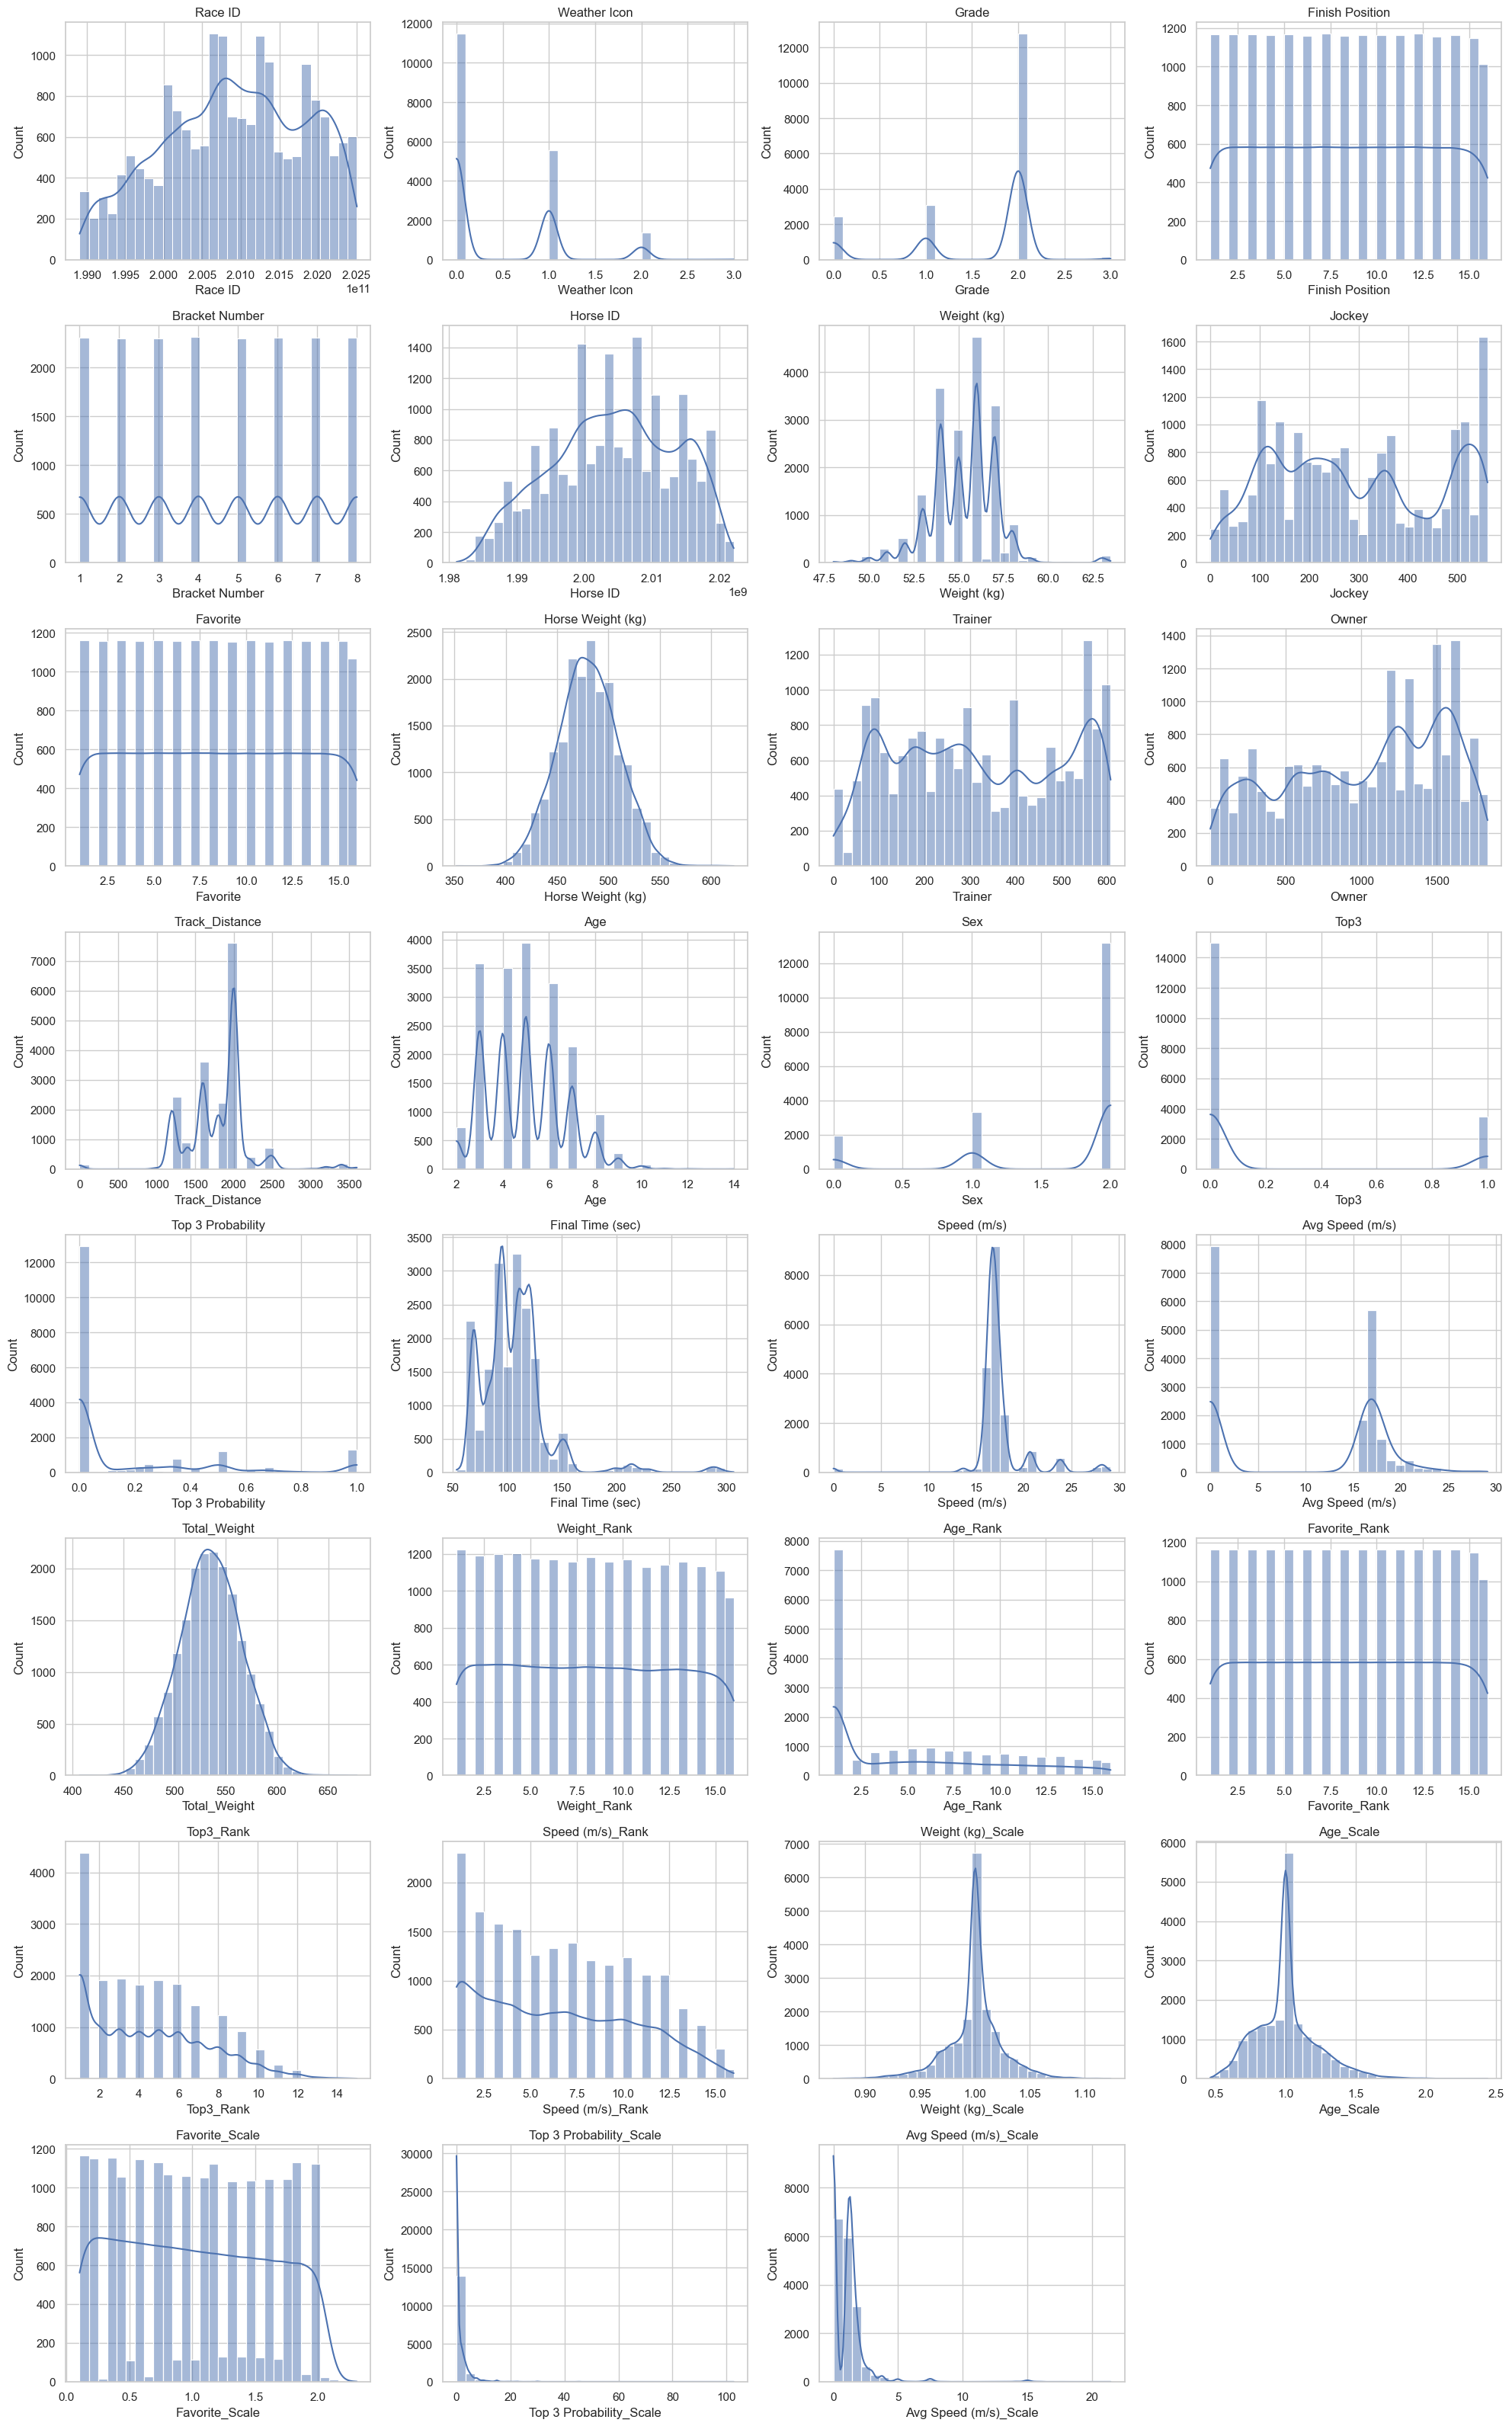

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
numerical_cols = new_race_df.select_dtypes(include=['float64', 'int64']).columns
cols_per_row = 4
total_cols = len(numerical_cols)
rows = math.ceil(total_cols / cols_per_row)
sns.set(style="whitegrid")
plt.figure(figsize=(cols_per_row * 5, rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(new_race_df[col], kde=True, bins=30)
    plt.title(f'{col}')
    plt.tight_layout()

plt.show()

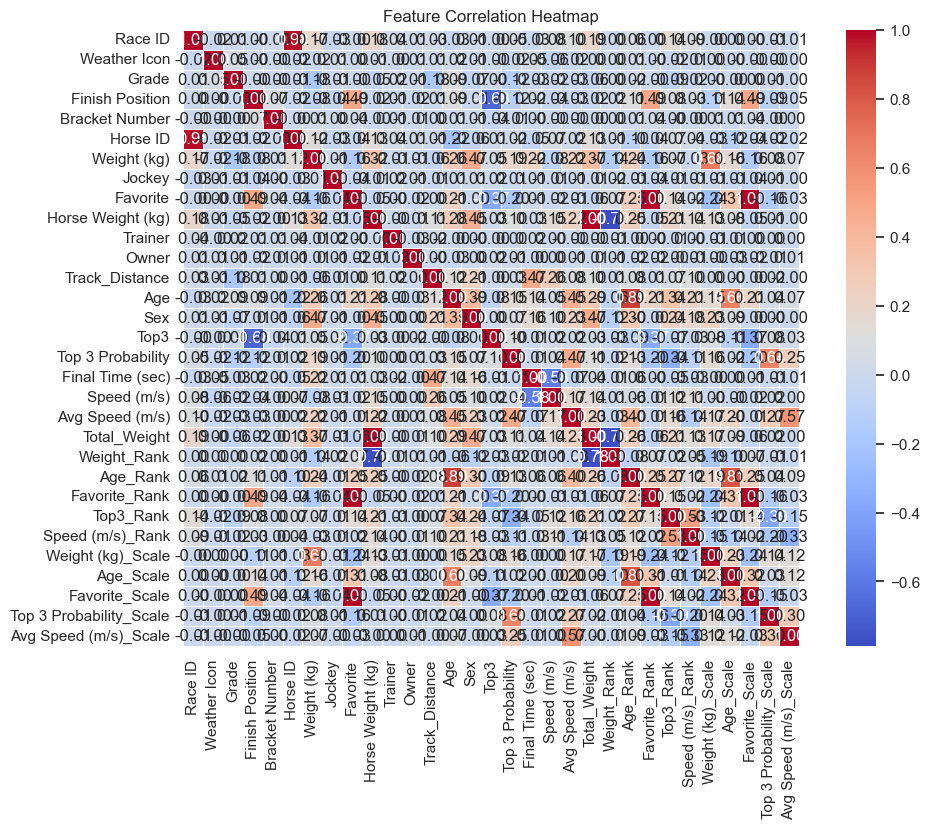

In [16]:
# Calculate the correlation coefficient matrix between numerical columns and display the heat map
corr_matrix = new_race_df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
# Get the correlation between the Finish Position column and other columns
finish_corr = corr_matrix["Finish Position"].drop("Finish Position")
# Sorting: By default, sorting is from high to low. If you want to sort from low to high, you can add ascending=True
sorted_corr = finish_corr.sort_values(ascending=False)
# Print sorting results
print("Finish Position Relevance Sorting:")
print(sorted_corr)

Finish Position Relevance Sorting:
Favorite_Rank              0.488313
Favorite                   0.487853
Favorite_Scale             0.486400
Age_Scale                  0.138132
Age_Rank                   0.107889
Age                        0.091306
Top3_Rank                  0.081441
Bracket Number             0.068319
Speed (m/s)_Rank           0.032376
Weight_Rank                0.022932
Final Time (sec)           0.016554
Trainer                    0.007099
Track_Distance             0.005530
Weather Icon               0.001996
Race ID                    0.000857
Grade                     -0.001126
Sex                       -0.006941
Horse ID                  -0.016088
Horse Weight (kg)         -0.016540
Owner                     -0.017993
Total_Weight              -0.021237
Avg Speed (m/s)           -0.033024
Speed (m/s)               -0.036649
Jockey                    -0.040614
Avg Speed (m/s)_Scale     -0.045693
Weight (kg)               -0.081733
Top 3 Probability_Scale   -0.

In [18]:
#Select 'Favorite_Rank', 'Age_Rank', 'Top3_Rank', 'Bracket Number', 'Speed ​​(m/s)_Rank', 'Track_Distance', 'Weight_Rank' as features
selected_features = [
    'Race ID',
    'Horse ID',
    'Favorite_Rank',
    'Age_Scale',
    'Bracket Number',
    'Top3_Rank',
    'Speed (m/s)_Rank',
    'Track_Distance',
    'Weight_Rank',
    'Finish Position'
]

feature_df = new_race_df[selected_features]
feature_df

,Race ID,Horse ID,Favorite_Rank,Age_Scale,Bracket Number,Top3_Rank,Speed (m/s)_Rank,Track_Distance,Weight_Rank,Finish Position
0,198906050809,1984106229,4.0,1.084337,8,1.0,1.0,2500,16.0,1
1,198906050809,1985104409,2.0,0.892857,3,1.0,1.0,2500,1.0,2
2,198906050809,1986106198,3.0,0.705882,7,1.0,1.0,2500,15.0,3
3,198906050809,1983103889,9.0,1.280488,6,1.0,1.0,2500,13.0,4
4,198906050809,1985102167,1.0,0.892857,1,1.0,1.0,2500,4.0,5
...,...,...,...,...,...,...,...,...,...,...
18450,202507010911,2020104861,12.0,0.892857,4,6.0,12.0,2000,8.0,12
18451,202507010911,2021105271,10.0,0.705882,8,1.0,9.0,2000,1.0,13
18452,202507010911,2019102665,13.0,1.084337,6,6.0,11.0,2000,13.0,14
18453,202507010911,2018105503,7.0,1.280488,3,6.0,12.0,2000,3.0,15


In [19]:
feature_df.to_csv('top_features_df.csv', index=False)

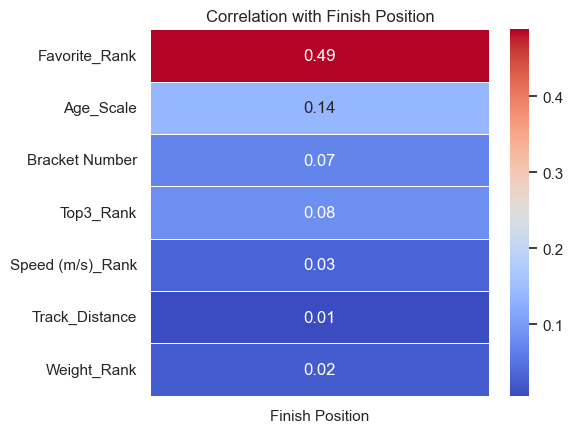

In [20]:
new_corr_matrix = feature_df.corr(numeric_only=True)
target_corr = new_corr_matrix[['Finish Position']].drop(['Finish Position','Race ID','Horse ID'])
plt.figure(figsize=(6, len(target_corr) * 0.5 + 1))
sns.heatmap(target_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Correlation with Finish Position")
plt.tight_layout()
plt.show()